![title](../images/header.png)

Merging all CEO data (2015-2022/2023)
-------
This notebook merges validated data from different CEO CAFI projects
CEO data must be merged and harmonized using the merge clean ceo data scripts
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [73]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'CMR'

In [74]:
# output file all CEO validated data file 
#ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_2015_2020_2022_2023_clean.csv'
ceo_data_out =  '/home/sepal-user/module_results/esbae/CMR/CMR_all_ceo_2015_2022_2023_clean.csv'

### 1. Read all CEO sample files

##### CEO data from phase I (optional)

In [75]:
ceo1520 = pd.read_csv('/home/sepal-user/CAFI_DDD/CAFI files/CAFI_all_ceo_validation_2015_2020_uniqueID.csv', low_memory=False)
ceo1520.reset_index(inplace=True)
ceo1520['collection']='coll_1520'
phase_I_columns = ceo1520.columns.tolist()
phase_I_columns

['index',
 'plotid_orig',
 'CEO_PLOTID',
 'lon',
 'lat',
 'ISO',
 'CEO_Ref_Code',
 'Ref_FNF_2015',
 'Ref_LCover_2015',
 'Ref_Change_Type_1520',
 'Ref_Year_1520',
 'countDrivers',
 'InfraR',
 'Urb',
 'ArtAg',
 'IndAg',
 'ArtFor',
 'IndFor',
 'ArtMine',
 'IndMine',
 'Other',
 'Source',
 'Ref_Change_Year_1520',
 'Change_Bin_1520',
 'UniqueID',
 'collection']

##### for 2015-2022 CEO sample data

In [76]:
ceo1522 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/CMR_all_ceo_1522_clean.csv')
print(ceo1522.columns.tolist())

['ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg',

##### use outputs from merge_clean_ceo_all_data

In [77]:
# use QC outputs if desired
ceo2023 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/CMR_all_ceo_2023_clean_qc.csv')
print(ceo2023.columns.tolist())

['ID', 'ID.1', 'plotid', 'sampleid', 'lon', 'lat', 'TNT_stratum', 'sample_geom', 'Ref_FNF_2022', 'Ref_Regeneration', 'Ref_Change_2023', 'Ref_Change_Type_2023', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_NFtype_2022', 'Ref_Ftype_2022', 'collection', 'interpreted', 'Ref_LCover_2022', 'Ref_Change_Year_2023', 'Ref_Change_LCover_2023', 'Def2023', 'Deg2023', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg', 'Swamp_Deg', 'Gallery_Deg', 'Plantation_Deg', 'Woodland_Deg', 'DensFor_stable', 'DensDryFor_stable', 'SecFor_stable', 'DryOpenFor_stable'

### end of parameters

In [50]:
#ceo1520 = ceo1520.loc[ceo1520['ISO'] == iso]

In [51]:
#len(ceo1520)

In [78]:
len(ceo1522)

6733

In [79]:
len(ceo2023)

3206

### merge all

In [80]:
#data_frames =[ceo1520, ceo1522, ceo2023]
data_frames =[ceo1522, ceo2023]

# Source file names corresponding to each data frame
#source_file = ['ceo_1520','ceo_1522', 'ceo_2023']  # Replace with your file names
source_file = ['ceo_1522', 'ceo_2023']  # Replace with your file names

# Merge data frames and add a new column for source file name
merged_ceo = pd.concat([df.assign(sampling=source_file) for df, source_file in zip(data_frames, source_file)], ignore_index=True)

In [81]:
merged_ceo.head()

,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_stable,DensDryFor_stable,SecFor_stable,DryOpenFor_stable,Mangrove_stable,Swamp_stable,Gallery_stable,Plantation_stable,Woodland_stable,ISO,sampling,ID.1,TNT_stratum,Ref_FNF_2022,Ref_Change_2023,Ref_Change_Type_2023,Ref_NFtype_2022,Ref_Ftype_2022,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,interpreted_qc
0,0,3195,3195.0,3195,11.966747,7.395009,POINT(11.966747 7.395009),1.0,NaN,0.0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,4.0,coll_1522_1,1,4.0,Stable,Stable_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,382369,382369.0,382369,13.462191,4.616583,POINT(13.462191 4.616583),1.0,NaN,1.0,Deg,1,0,0,0,0,0,NaN,0,0,0,2022.0,NaN,1.0,coll_1522_1,1,1.0,Deg2022,Deg_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,381976,381976.0,381976,13.326331,4.472166,POINT(13.326331 4.472166),1.0,NaN,0.0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,381269,381269.0,381269,13.454098,4.943217,POINT(13.454098 4.943217),1.0,NaN,0.0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,379902,379902.0,379902,13.021454,4.519678,POINT(13.021454 4.519678),1.0,NaN,0.0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
len(merged_ceo)

9939

In [83]:
merged_ceo['collection'].value_counts(dropna=False)

collection
coll_1522_2    6235
coll_2023_4    1000
coll_2023_6     704
coll_1522_1     498
coll_2023_1     497
coll_2023_2     497
coll_2023_5     304
coll_2023_3     204
Name: count, dtype: int64

In [84]:
print(merged_ceo.columns.tolist())

['ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg',

### 2. Combine and consolidate columns

In [85]:
#Ref_LCover will be blank where LCover is NF in 2022, because it could have been forest in 2015
# Create a new column by concatenating Ref_LCover, Ref_LCover_2015, and Ref_FType_2022
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].fillna(merged_ceo['Ref_Ftype_2022']).astype(float).fillna(0).astype(int).astype(str)
merged_ceo['Ref_LCover_2015'].value_counts(dropna=False)

Ref_LCover_2015
12    1904
0     1697
3     1314
1     1259
9     1209
11     840
15     436
13     290
4      245
16     222
17     148
2      120
8      113
10      57
14      41
7       29
18      15
Name: count, dtype: int64

In [86]:
# Create the new 'Ref_FNF' column
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].astype(float)

condition = merged_ceo['Ref_LCover_2015'] < 12

# Apply the condition using numpy.where
merged_ceo['Ref_FNF_2015'] = np.where(condition, 1, 
                                             np.where(merged_ceo['Ref_LCover_2015'].notna(), 0, np.nan))
merged_ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1.0    6883
0.0    3056
Name: count, dtype: int64

In [87]:
merged_ceo['Ref_FNF_2015']=merged_ceo['Ref_FNF_2015'].fillna(0).astype(int).astype(str)
merged_ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1    6883
0    3056
Name: count, dtype: int64

In [88]:
#merged_ceo['Ref_Change_Type_1523'] = merged_ceo['Ref_Change_Type_1520'].fillna(merged_ceo['Ref_Change_Type_1522']).fillna(merged_ceo['Ref_Change_Type_2023'])
merged_ceo['Ref_Change_Type_1523'] = merged_ceo['Ref_Change_Type_1522'].fillna(merged_ceo['Ref_Change_Type_2023'])

# Set rows where Ref_Change_Type_2023 is 'NF' to NaN
merged_ceo.loc[merged_ceo['Ref_Change_Type_2023'] == 'NF', 'Ref_Change_Type'] = pd.NA

# Print the value counts
print(merged_ceo['Ref_Change_Type_1523'].value_counts(dropna=False))

Ref_Change_Type_1523
NF        4753
Stable    4556
Deg        385
Def        245
Name: count, dtype: int64


In [89]:
#merged_ceo['Ref_Change_Year_1523'] = merged_ceo['Ref_Change_Year_1520'].fillna(merged_ceo['Ref_Change_Year_1522']).fillna(merged_ceo['Ref_Change_Year_2023'])
merged_ceo['Ref_Change_Year_1523'] = merged_ceo['Ref_Change_Year_1522'].fillna(merged_ceo['Ref_Change_Year_2023'])

merged_ceo['Ref_Change_Year_1523'].value_counts(dropna=False)

Ref_Change_Year_1523
NF         4753
Stable     4556
Deg2021      88
Deg2023      88
Deg2022      42
Def2021      39
Def2017      38
Deg2020      37
Def2023      37
Def2016      36
Deg2017      35
Deg2016      34
Deg2019      34
Def2018      29
Deg2018      27
Def2019      25
Def2022      21
Def2020      20
Name: count, dtype: int64

In [90]:
pd.pivot_table(merged_ceo,values='plotid',index=['Ref_Change_Type_1523'],columns=['collection'],aggfunc="count",margins=True,
                             margins_name='Total')

collection,coll_1522_1,coll_1522_2,coll_2023_1,coll_2023_2,coll_2023_3,coll_2023_4,coll_2023_5,coll_2023_6,Total
Ref_Change_Type_1523,,,,,,,,,
Def,8.0,200.0,NaN,6.0,3.0,12.0,11.0,5.0,245
Deg,25.0,272.0,NaN,20.0,3.0,49.0,4.0,12.0,385
NF,164.0,2892.0,215.0,206.0,166.0,407.0,233.0,470.0,4753
Stable,301.0,2871.0,282.0,265.0,32.0,532.0,56.0,217.0,4556
Total,498.0,6235.0,497.0,497.0,204.0,1000.0,304.0,704.0,9939


In [91]:
merged_ceo['ISO'] = iso

In [92]:
merged_ceo_column_names = merged_ceo.columns.tolist()
# Print the list of column names
merged_ceo_column_names

['ID',
 'plotid',
 'point_id',
 'sampleid',
 'lon',
 'lat',
 'sample_geom',
 'Ref_FNF_2015',
 'Ref_Regeneration',
 'Ref_Change_1522',
 'Ref_Change_Type_1522',
 'ArtFor',
 'ArtMine',
 'InfraR',
 'Urb',
 'IndFor',
 'Other',
 'Other_Desc',
 'IndMine',
 'IndAg',
 'ArtAg',
 'Ref_Year_1522',
 'Ref_NFtype_2015',
 'Ref_Ftype_2015',
 'collection',
 'interpreted',
 'Ref_LCover_2015',
 'Ref_Change_Year_1522',
 'Ref_Change_LCover_1522',
 'Def2016',
 'Def2017',
 'Def2018',
 'Def2019',
 'Def2020',
 'Def2021',
 'Def2022',
 'Deg2016',
 'Deg2017',
 'Deg2018',
 'Deg2019',
 'Deg2020',
 'Deg2021',
 'Deg2022',
 'Defall',
 'Degall',
 'Stable',
 'NF',
 'DensFor',
 'DensDryFor',
 'SecFor',
 'DryOpenFor',
 'Mangrove',
 'Swamp',
 'Gallery',
 'Plantation',
 'Woodland',
 'Shrubland',
 'Grassland',
 'Aquatic',
 'Bare',
 'Cultivated',
 'Builtup',
 'Water',
 'DensFor_Def',
 'DensDryFor_Def',
 'SecFor_Def',
 'DryOpenFor_Def',
 'Mangrove_Def',
 'Swamp_Def',
 'Gallery_Def',
 'Plantation_Def',
 'Woodland_Def',
 'DensFor

In [93]:
merged_ceo = merged_ceo.drop(columns=['ID.1','Ref_Change_Type',
 'TNT_stratum'])

### 3. plot change points by year

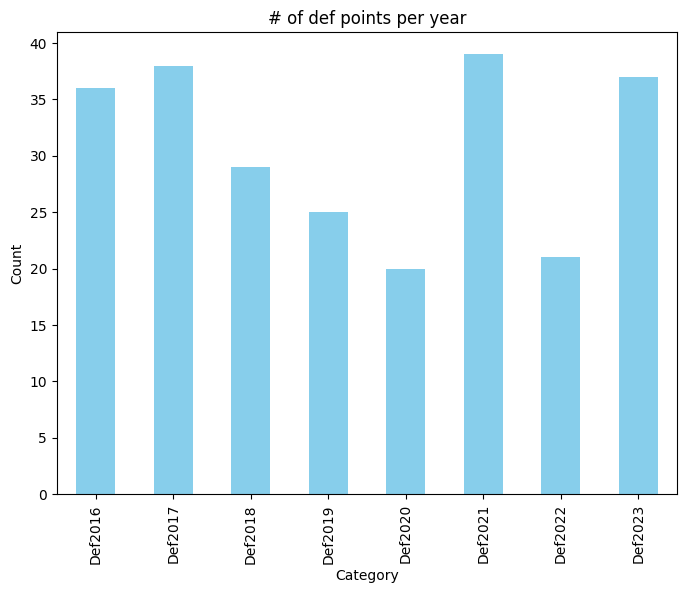

In [94]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Def2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1523'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1523'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

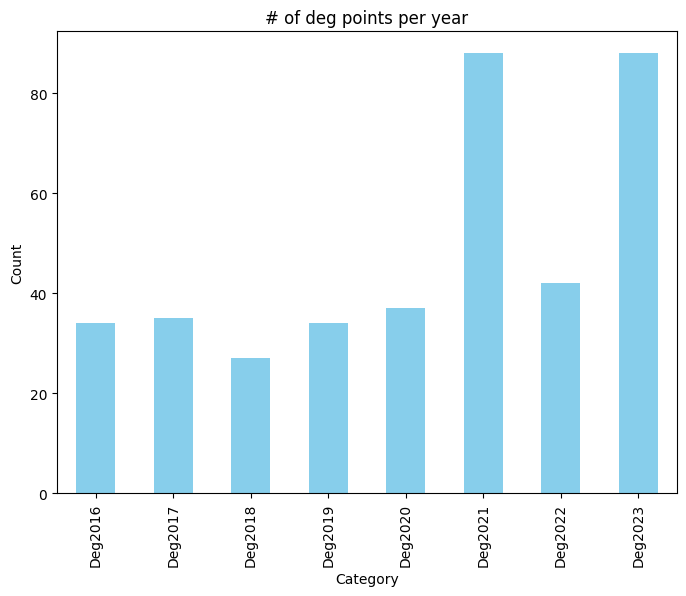

In [95]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','Deg2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1523'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1523'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [96]:
merged_ceo.head()

,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_stable,DensDryFor_stable,SecFor_stable,DryOpenFor_stable,Mangrove_stable,Swamp_stable,Gallery_stable,Plantation_stable,Woodland_stable,ISO,sampling,Ref_FNF_2022,Ref_Change_2023,Ref_Change_Type_2023,Ref_NFtype_2022,Ref_Ftype_2022,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,interpreted_qc,Ref_Change_Type_1523,Ref_Change_Year_1523
0,0,3195,3195.0,3195,11.966747,7.395009,POINT(11.966747 7.395009),1,NaN,0.0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,4.0,coll_1522_1,1,4.0,Stable,Stable_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,Stable
1,1,382369,382369.0,382369,13.462191,4.616583,POINT(13.462191 4.616583),1,NaN,1.0,Deg,1,0,0,0,0,0,NaN,0,0,0,2022.0,NaN,1.0,coll_1522_1,1,1.0,Deg2022,Deg_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deg,Deg2022
2,2,381976,381976.0,381976,13.326331,4.472166,POINT(13.326331 4.472166),1,NaN,0.0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,Stable
3,3,381269,381269.0,381269,13.454098,4.943217,POINT(13.454098 4.943217),1,NaN,0.0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,Stable
4,4,379902,379902.0,379902,13.021454,4.519678,POINT(13.021454 4.519678),1,NaN,0.0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1.0,coll_1522_1,1,1.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CMR,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,Stable


### 4. export ceo data to one csv file

In [97]:
merged_ceo.to_csv(ceo_data_out,index_label='UID')